# General relativity using symbolic computer algebra

In [1]:
from gravipy import *
init_printing()

## Schwarzschild solution

In this notebook, we will derive the outer Schwarzschild solution describing space-time outside a spherically symmetric mass $M$. We will assume that the solution is spherically symmetric so that the components $g_{00}$ and $g_{11}$ only depend on the radial coordinate $r$. For simplicity, we further assume the metric tensor to be independent of time even though this assumption does not need to be imposed.

## Derivation of the Schwarzschild solution

We choose as our coordinates $t, r, \theta,$ and $\phi$:

In [2]:
t, r, theta, phi = symbols(r't, r, \theta, \phi')
x = Coordinates('x', [t, r, theta, phi])
x.c

Assuming a time-independent, spherically symmetric solution, the line element is chosen to be of the general form

$$\mathrm{d}s^2 = -A(r)c^2\mathrm{d}t^2+B(r)\mathrm{d}r^2+r^2\mathrm{d}\theta^2+r^2\sin(\theta)^2\mathrm{d}\phi^2$$

where we need to determine the form of $A$ and $B$ as a function of the radial coordinate $r$.

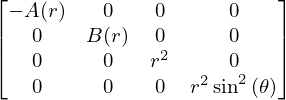

In [3]:
A = Function('A')(r)
B = Function('B')(r)
Metric = diag(-A, B, r**2, r**2*sin(theta)**2)
g = MetricTensor('g', x, Metric)
g(All, All)

We are searching for the outer solution, i.e. a solution outside of the mass generating a curved space-time. In the Einstein field equations

$$G^{\mu\nu} = \frac{8\pi G}{c^4}T^{\mu\nu}$$

the energy-momentum tensor on the right-hand side thus vanishes and we are searching for a solution of

$$G^{\mu\nu}=0.$$

In other words, we need to determine functions $A(r)$ and $B(r)$ for which the Einstein tensor obtained from the metric tensor vanishes.

Before the Einstein tensor can be determined with `GraviPy`, it is first necessary to evaluate the Christoffel symbols and the Ricci tensor.

In [4]:
Gamma = Christoffel(r'\Gamma', g)
Ri = Ricci('Ri', g)
G = Einstein('G', Ri)

The Einstein tensor is obtained as

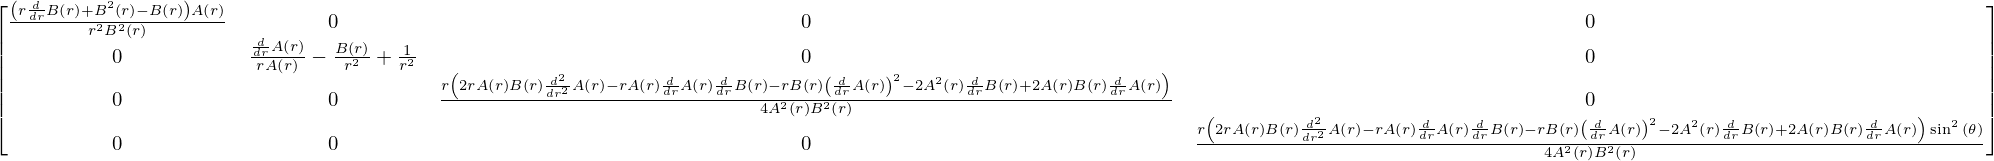

In [5]:
G(All, All)

It turns out that $G_{22}$ and $G_{33}$ ar trivially related by a factor $\sin^2(\theta)$

In [6]:
G(4, 4)/G(3, 3)

so that it is sufficient to solve the set of equations

$$G_{00}=0,\quad G_{11}=0,\quad G_{22}=0.$$

We note that the first equation essentially depends only on $B(r)$. We recall that the indices in GraviPy objects are shifted by 1 with respect to our sign convention, so that $G_{00}$ corresponds to `G(1, 1)`. The differential equation $G_{00}=0$ can be solved by means of SymPy's `dsolve` method:

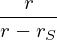

In [7]:
C1 = Symbol('C1')
rs = Symbol('r_S')
B_solution = dsolve(G(1, 1), B).rhs.subs(C1, -rs)
B_solution

Since $C_1$ is considered by SymPy as a free parameter whose name can be changed, we need to give a different name to have consistent free parameters in the solutions for $A(r)$ and $B(r)$. Since the dimension of $C_1$ is a length, we call the free constant $r_S$ in view of its later interpretation. Our choice of the minus sign will turned out to be appropriate as well.

In order to solve the second equation $G_{11}=0$, we need to substitute $B(r)$ by the solution we just found. This is done by means of SymPy's `subs` method. We can now solve the differential equation for $A(r)$.

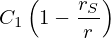

In [8]:
A_solution = dsolve(G(2, 2).subs(B, B_solution), A).rhs
A_solution

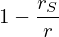

In [9]:
A_solution = A_solution/limit(A_solution, r, oo)
A_solution

It turns out that the remaining equation $G_{22} = 0$ is trivially fulfilled by the solutions obtained for $A(r)$ and $B(r)$:

In [10]:
G(3, 3).subs(A, A_solution).subs(B, B_solution).doit().simplify()

The same is obviously true for $G_{33}$.

We are thus left with one free parameter which was to be expected because the mass $M$ of the central object should remain as a parameter. The parameter can be determined by comparing the spectral shift obtained from our solution with the spectral shift obtained from the Newtonian gravitational field as demanded by the equivalence principle. Assuming that the frequency $\nu(r)$ of a photon at radial coordinate $r$ is measured when its frequency at infinity was $\nu(\infty)$, we have
$$\frac{\nu(r)}{\nu(\infty)} = \frac{1}{\sqrt{-g_{00}}} \overset{!}{=} 1+\frac{GM}{c^2r}.$$

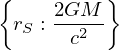

In [11]:
g00 = g(1, 1).subs(A, A_solution)
coeff_one_over_r = series(1/sqrt(-g00), 1/r, 0, 2).coeff(r, -1)
grav_const, M, c = symbols('G, M, c')
c2_solution = solve(coeff_one_over_r-grav_const*M/c**2, rs, dict=True)[0]
c2_solution

Here, we have found the Schwarzschild radius as a function of the mass $M$ of the central object, the gravitational constant $G$ and the vacuum speed of light $c$.

We thus obtain the functions $A(r)$ and $B(r)$ as

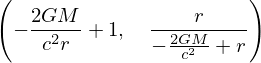

In [12]:
A_solution = A_solution.subs(c2_solution)
B_solution = B_solution.subs(c2_solution)
A_solution, B_solution

Inserting the functions $A(r)$ and $B(r)$ into the ansatz for the metric, we arrive at the Schwarzschild metric:

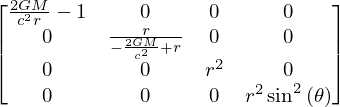

In [13]:
Metric = diag(-A_solution, B_solution, r**2, r**2*sin(theta)**2)
g = MetricTensor('g', x, Metric)
g(All, All)

With the Schwarzschild radius
$$r_\mathrm{S} = \frac{2GM}{c^2},$$
our final result for the Schwarzschild line element thus reads
$$\mathrm{d}s^2 = -\left(1-\frac{r_\text{S}}{r}\right)c^2\mathrm{d}t^2+\frac{1}{1-\frac{r_\text{S}}{r}}\mathrm{d}r^2+r^2\mathrm{d}\theta^2+r^2\sin(\theta)^2\mathrm{d}\phi^2.$$
The Einstein tensor indeed vanishes as it should:

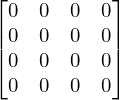

In [14]:
Ga = Christoffel('Ga', g)
Ric = Ricci('Ric', g)
Einst = Einstein('Einst', Ric)
Einst(All, All)

The Riemann tensor, on the other hand, contains non-vanishing elements. The space-time in the source-free region described by the Schwarzschild metric is thus curved.

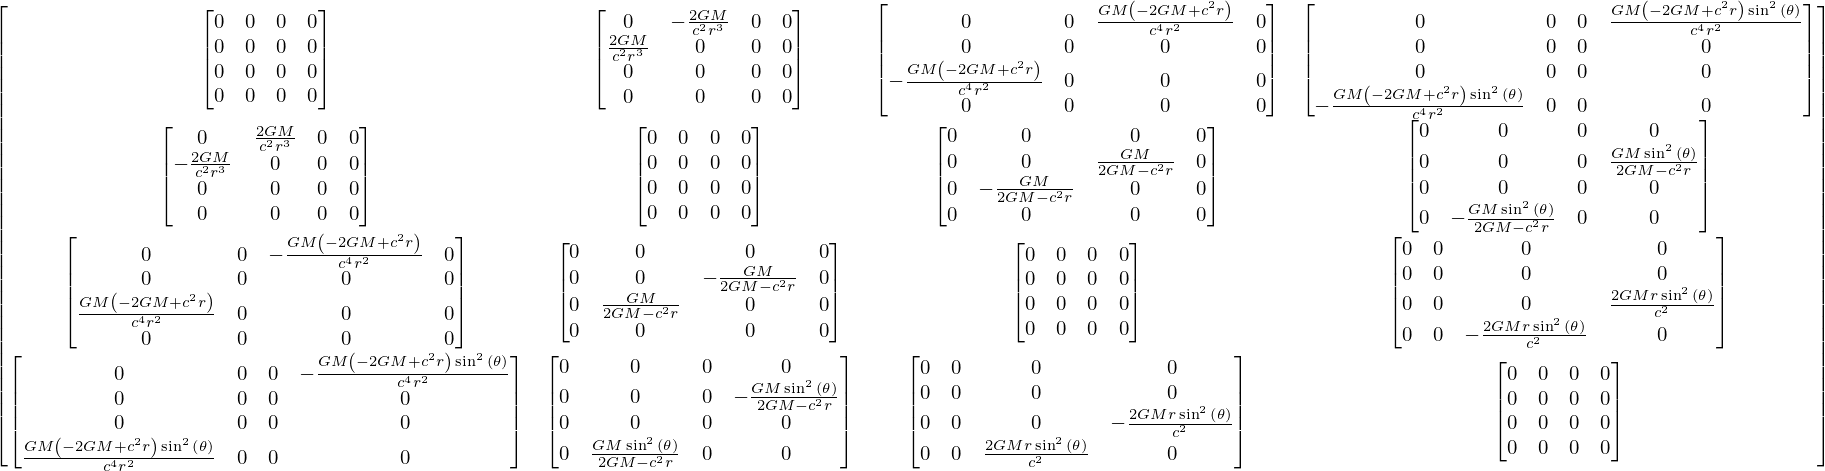

In [15]:
Rm = Riemann('Rm', g)
Rm(All, All, All, All)

The metric in the coordinates chosen here contains two singularities, namely at $r=0$ and $r=r_\mathrm{S}$. In order to decide which one of those is a real singularity, we determine the Kretschmann invariant
$$R_{\mu\nu\rho\sigma}R^{\mu\nu\rho\sigma}.$$
This quantity is independent of the chose coordinates

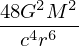

In [16]:
from itertools import product
Kretschmann = symbols('Kretschmann')
Kretschmann = 0
for mu, nu, rho, sigma in product(range(1, 5), repeat=4):
    Kretschmann = Kretschmann+Rm(mu, nu, rho, sigma)*Rm(-mu, -nu, -rho, -sigma)
simplify(Kretschmann)

Indeed, the only singularity of the Schwarzschild metric is found at $r=0$. The singularity at $r_\mathrm{S}$ can be removed by an appropriate choice of coordinates.